# Problem Statement

#### Bomm Bikes a bike sharing company has made an attempt to understand the demand for shared bikes among the people. Specifically they want to understand the factors affecting the demand for shared bikes in the American market. The company wants to know:

###### 1. Which variables are significant in predicting demand demand for shared bikes.
###### 2. How well those variables describe the bike demands.

###### Goal:
- To create a linear model that quantitatively relates bike demand with variables, such as the holiday, weather, season or month etc.
- To know the accuracy of the model, i.e. how well do these variables predict the bike demand

##### Steps followed in the Linear Regression Modelling:
- Step 1: Reading and Understanding Data
- Step 2: Visualizing the Data
- Step 3: Prepare the data for Modelling
    - Encoding -> Binary Variable to 0 or 1
    - Categorical variable to dummy variables
    - Split the data to train and test set
    - Rescaling the features
- Step 4: Train the model
- Step 5: Residual Analysis
- Step 6: Prediction and Evaluation on Test data set

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import libraries that will be used here
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [3]:
#loading bike sharing data set
bike_df = pd.read_csv('day.csv')

### Step 1 - Reading and Understanding Data

In [4]:
#explore the data by looking at column and values
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [54]:
bike_df[bike_df['holiday'] == 0].sum()

instant                                                  258721
dteday        01-01-201802-01-201803-01-201804-01-201805-01-...
season                                                     1773
yr                                                          354
mnth                                                       4619
holiday                                                       0
weekday                                                    2150
workingday                                                  499
weathersit                                                  991
temp                                               14432.683896
atemp                                              16854.462885
hum                                                  44527.6989
windspeed                                           9045.442032
casual                                                   597593
registered                                              2614817
cnt                                     

In [7]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2 - Visulazing Data
###### This is most important step to understand your data set.
- If there is some obvious multicollinearity going on, this is the first place to catch it.
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We can make use of matplot lib and seaborn to visualize the data set.


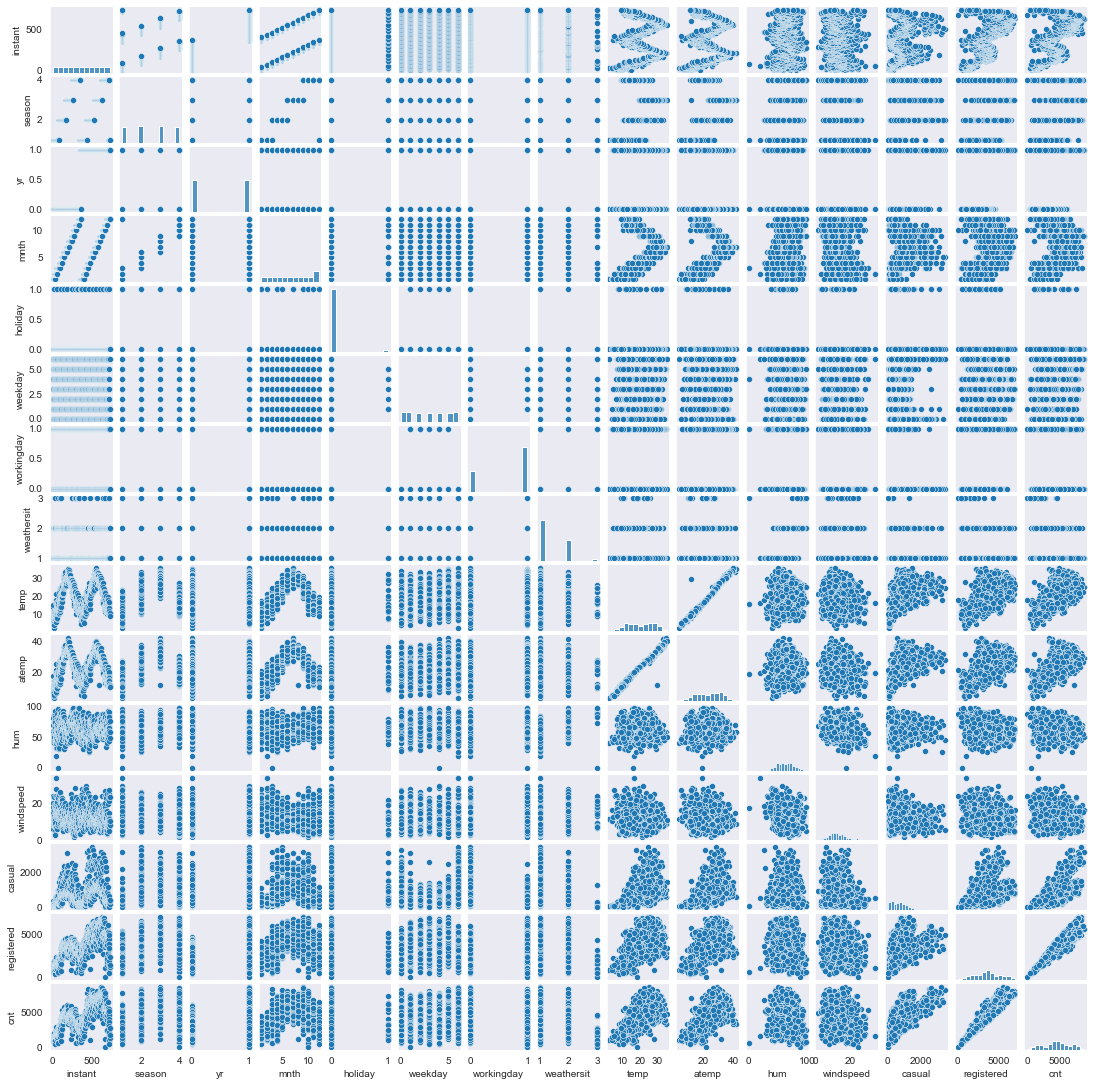

In [8]:
g = sns.pairplot(bike_df)
g.fig.set_size_inches(15,15)
plt.show()

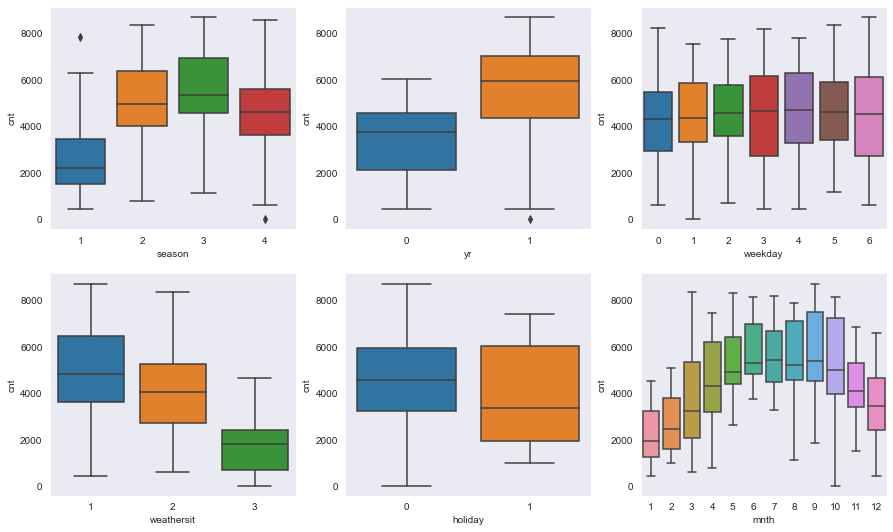

In [9]:
#box plot visualization for categorical variable with count (cnt)
plt.figure(figsize=(15,9))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike_df)

plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)

plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)

plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)

plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)

plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)

plt.show()

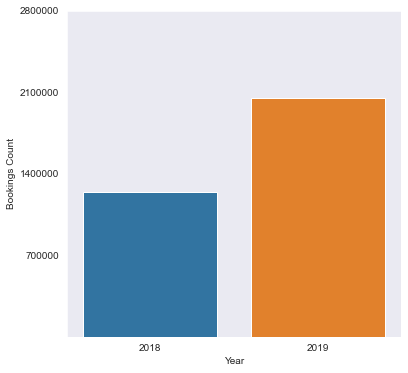

In [10]:
#Total Number of bookings in 2018 and 2019
plt.figure(figsize=(6,6))
g = sns.barplot(x='yr', y='cnt', data=bike_df, estimator=sum, ci=None)
ticks = [700000, 1400000, 2100000, 2800000]
g.set_yticks(ticks)
g.set_xticklabels(['2018', '2019'])
g.set(xlabel="Year", ylabel="Bookings Count")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

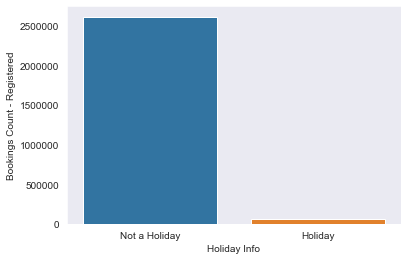

In [51]:
#holiday with registered and casual registrations
#plt.figure(figsize=(15,9))

#plt.subplot(1,2,1)
h = sns.barplot(x='holiday', y='registered', data=bike_df, estimator=sum, ci=None)
#ticks = [3000000, 6000000, 9000000, 12000000]
#h.set_yticks(ticks)
h.set_xticklabels(['Not a Holiday', 'Holiday'])
h.set(xlabel="Holiday Info", ylabel="Bookings Count - Registered")
plt.ticklabel_format(style='plain', axis='y')
#.set(title='Total Registered Bookings in 2018 and 2019 in holiday and non-holiday', xlabel='Holiday', ylabel='Registered Booking')


plt.show()

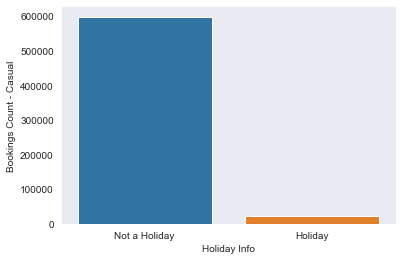

In [52]:
#plt.subplot(1,2,2)
i = sns.barplot(x = 'holiday', y = 'casual', data = bike_df, estimator=sum, ci=None)
#ticks = [200000, 400000, 600000, 800000]
#i.set_yticks(ticks)
i.set_xticklabels(['Not a Holiday', 'Holiday'])
i.set(xlabel="Holiday Info", ylabel="Bookings Count - Casual")
plt.ticklabel_format(style='plain', axis='y')
plt.show()
#.set(title='Total Casual Bookings in 2018 and 2019 in holiday and non-holiday', xlabel='Holiday', ylabel='Casual Booking')

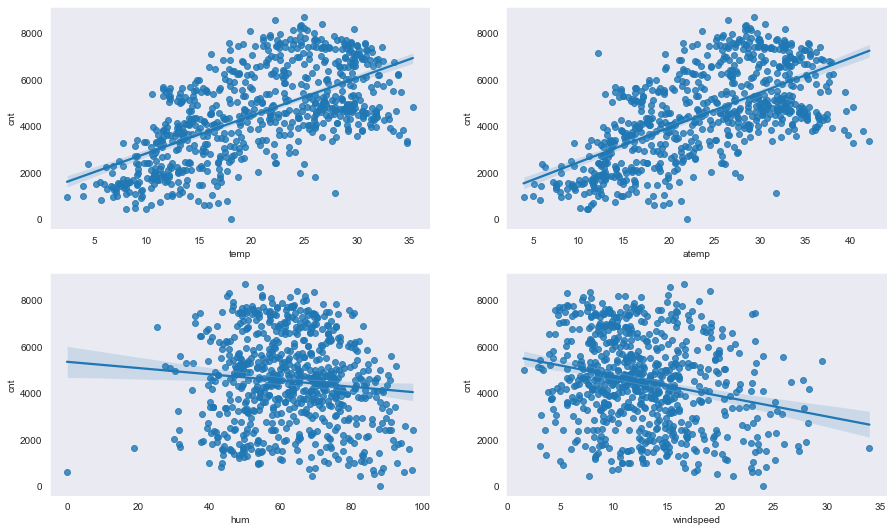

In [58]:
plt.figure(figsize=(15,9))

plt.subplot(2,2,1)
sns.regplot(x='temp', y='cnt', data=bike_df)

plt.subplot(2,2,2)
sns.regplot(x='atemp', y='cnt', data=bike_df)

plt.subplot(2,2,3)
sns.regplot(x='hum', y='cnt', data=bike_df)

plt.subplot(2,2,4)
sns.regplot(x='windspeed', y='cnt', data=bike_df)


plt.show()

###### Analysis outcome with Step 1 & Step 2 - Reading &Visualizing data set:
- Seasonal Aspect, Demand is:
        - High in Summer and Fall 
        - Average in Winter
        - Low in Summer

- Weather Situation, Demand is:
        - High on Clear, Partly Cloudy days
        - Average on Misty, Cloudy days
        - Low on Snow and Rainy days

- Temperature and feels like temperature, Demand:
        - Surges as temperature rises
        
- Higher Humidity and Lower windspeed shows higher booking 

- Month Aspect, Demand:
        - Peak near month of May, June, July, August September
        - Tapers on either side of the year w.r.t above months.

- Registered Customers with respect to holidays/non-holidays:
        - Higher percentage of booking(both casual and registered) happens in non-holidays.
        - During holiday the booking remains very low (both casual and registered) when compared to non-holidays.

- Total Number of Bookings has seen good increase from year 2018 to 2019.